# Практическая работа №1 Разведочный анализ. Графики

выполнил студент
группы Т50-11-23
Шаймарданов Ренат

***Цель работы:*** Провести разведочный анализ данных по датасету. Составить графики, проанализировать их.

***Ход работы:***

                                                                                            Выполнил студент 
                                                                                            группы Т50-11-23
                                                                                            Шаймарданов Ренат

## Цель работы: провести разведочный анализ данных по датасету. Составить графики, проанализировать их.

## Ход работы:

In [ ]:
Импорт необходимых библиотек: Pandas дляобработки и анализа данных, 
Matplotlibдля создания разных видов графиков, 
Seaborn для создания сложный математических графиков.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# На 3

## Загрузка датасета;

In [ ]:
df = pd.read_csv('train_and_test2.csv')

## Просмотр и исследование датасета;

In [ ]:
print(df['Passengerid']) # Вывод столбца 'Id пассажира'
print(df['Age']) # Вывод столбца 'Возраст'
print(df['Fare']) # Вывод столбца 'Цена билета'
print(df['Sex'])  # Вывод столбца 'Пол' заметим в датасете, что в мужчина - ноль, а женщина -"1"
print(df['sibsp']) # Вывод столбца 'Количество семейных пар'

## Обработка датасета

- Удаление хотя бы одного признака;

In [62]:
df.drop('Passengerid', axis=1, inplace=True) # Удаляем столбец 'Passengerid'

- Замена и удаление значений;

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True) # Заполняем пропуски в 'Age' средним значением
df.dropna(subset=['Fare'], inplace=True) # Удаление строк с пропущенными значениями в 'Fare'
print(df) #вывод всех значений но без нулевых значений в 'Fare'

- Отсортировать значения в датафрейме по указанному столбцу;

In [66]:
df.sort_values(by=['Fare'], ascending=False, inplace=True)

- Убрать дубликаты в датафреме;

In [64]:
df.drop_duplicates(inplace=True)

 ### Написать заключение по проведенному исследованию;

Проведенный анализ показал, что пол пассажира был одним из ключевых факторов, влиявших на выживаемость на Титанике. Правило "женщины и дети первыми" действительно работало. Кроме того, класс каюты также играл важную роль в выживаемости, в первых и треьих классах чаще встречаются выжившие люди.

### Сохранить датасет.

In [152]:
df.to_csv('processed_titanic.csv', index=False) 

## На 4

***Категориальный атрибут - строка "Пол".***

***Изучить, как правило «женщины и дети первыми» отразилось на выживаемости мужчин и женщин во время крушения «Титаника».***

### Продемонстрировать график количества значений категориального атрибута(countplot);

- выбрать наибольший из признаков

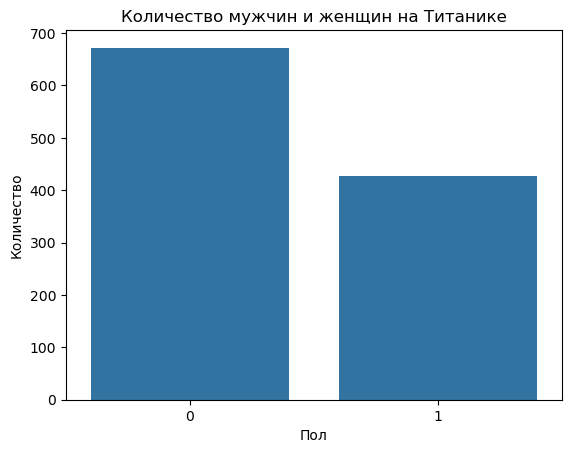

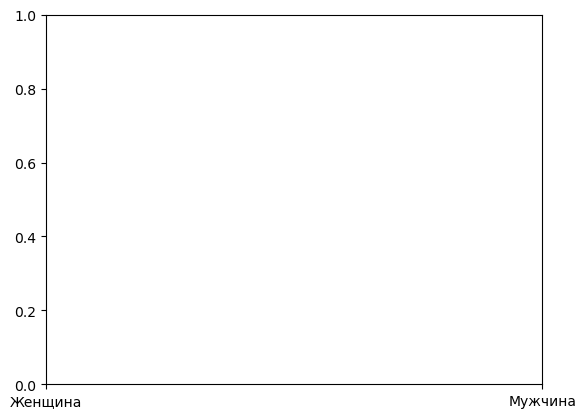

Наибольший признак 'Sex': 0


In [100]:
sns.countplot(x='Sex', data=df)
plt.title('Количество мужчин и женщин на Титанике')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()
max_sex = df['Sex'].value_counts().idxmax()
print(f"Наибольший признак 'Sex': {max_sex}")

- выбрать наименьший из признаков

In [102]:
min_sex = df['Sex'].value_counts().idxmin()
print(f"Наименьший признак 'Sex': {min_sex}")

Наименьший признак 'Sex': 1


## Отобразить среднее значение атрибутов (barplot);

- найти наибольшее среднее значение 

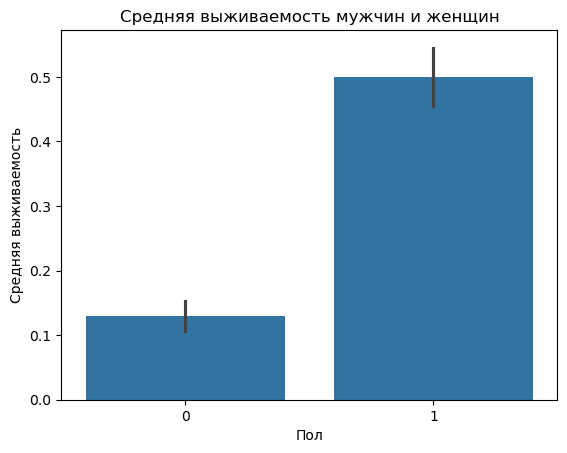

Наибольшее среднее значение выживаемости: 0.5


In [129]:
# Barplot для среднего значения выживаемости по полу
sns.barplot(x='Sex', y='2urvived', data=df)
plt.title('Средняя выживаемость мужчин и женщин')
plt.xlabel('Пол')
plt.ylabel('Средняя выживаемость')
plt.show()

# Нахождение наибольшего среднего значения выживаемости
mean_survival_by_sex = df.groupby('Sex')['2urvived'].mean()
max_mean_survival = mean_survival_by_sex.max()
print(f"Наибольшее среднее значение выживаемости: {max_mean_survival}")

- Найти наибольший доверительный интервал 

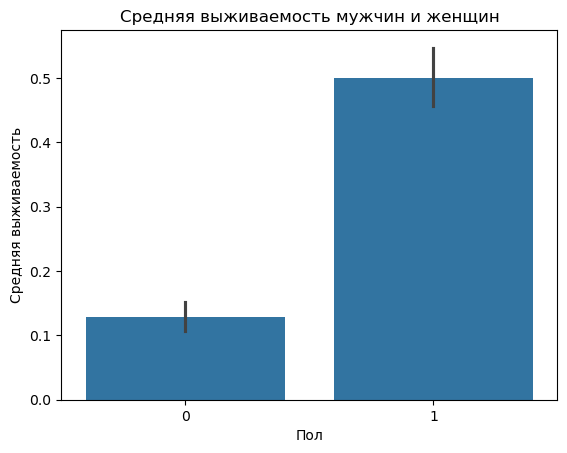

Наибольший доверительный интервал: 1
Наименьшее среднее значение выживаемости: 0.12930011862396204, для полов: [0]


In [127]:
# Нахождение наибольшего доверительного интервала
mean_survival_by_sex = df.groupby('Sex')['2urvived'].mean()
std_survival_by_sex = df.groupby('Sex')['2urvived'].std()
n_by_sex = df.groupby('Sex')['2urvived'].count()

# Расчет доверительных интервалов
confidence_intervals = []
for sex, mean, std, n in zip(mean_survival_by_sex.index, mean_survival_by_sex.values, std_survival_by_sex.values, n_by_sex.values):
  confidence_interval = (mean - 1.96 * std / n ** 0.5, mean + 1.96 * std / n ** 0.5)
  confidence_intervals.append((sex, confidence_interval))

max_confidence_interval_sex = max(confidence_intervals, key=lambda x: x[1][1] - x[1][0])[0]
print(f"Наибольший доверительный интервал: {max_confidence_interval_sex}")

- Найти наименьшее среднее значение (может быть несколько вариантов)

In [ ]:
# Нахождение наименьшего среднего значения выживаемости
min_mean_survival = mean_survival_by_sex.min()
min_mean_survival_sex = mean_survival_by_sex[mean_survival_by_sex == min_mean_survival].index.tolist()
print(f"Наименьшее среднее значение выживаемости: {min_mean_survival}, для полов: {min_mean_survival_sex}")

## Реализовать ящик с усами (boxplot);

- Найти наибольшую медиану

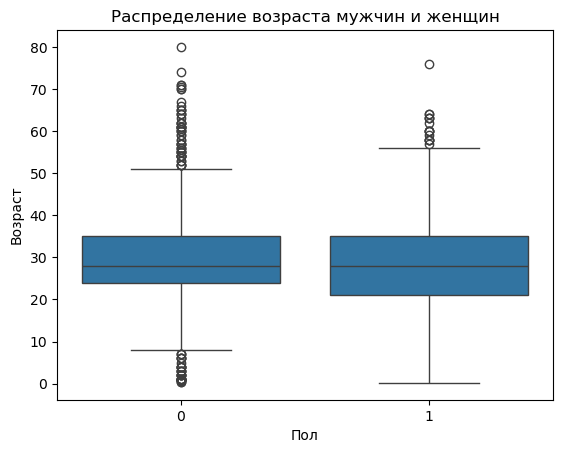

Наибольшая медиана возраста: 28.0
Наибольшее количество выбросов по возрасту: 92
Наименьшее количество выбросов по возрасту: 17


In [110]:
# Boxplot для возраста по полу
sns.boxplot(x='Sex', y='Age', data=df)
plt.title('Распределение возраста мужчин и женщин')
plt.xlabel('Пол')
plt.ylabel('Возраст')
plt.show()

# Нахождение наибольшей медианы
medians_by_sex = df.groupby('Sex')['Age'].median()
max_median_age = medians_by_sex.max()
print(f"Наибольшая медиана возраста: {max_median_age}")

- Найти наибольшее количество выбросов  

In [155]:
# Нахождение наибольшего количества выбросов
def count_outliers(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  outliers = data[(data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)]
  return len(outliers)

outliers_by_sex = df.groupby('Sex')['Age'].apply(count_outliers)
max_outliers_count = outliers_by_sex.max()
print(f"Наибольшее количество выбросов по возрасту: {max_outliers_count}")

Наибольшее количество выбросов по возрасту: 92


- Найти наименьшее количество выбросов

In [157]:
# Нахождение наименьшего количества выбросов
min_outliers_count = outliers_by_sex.min()
print(f"Наименьшее количество выбросов по возрасту: {min_outliers_count}")

Наименьшее количество выбросов по возрасту: 17


## Сделать тепловую карту корреляции (heatmap);

- Найти наибольшую корреляцию между признаками и сделать вывод по этому (можно описать несколько самых взаимосвязанных)

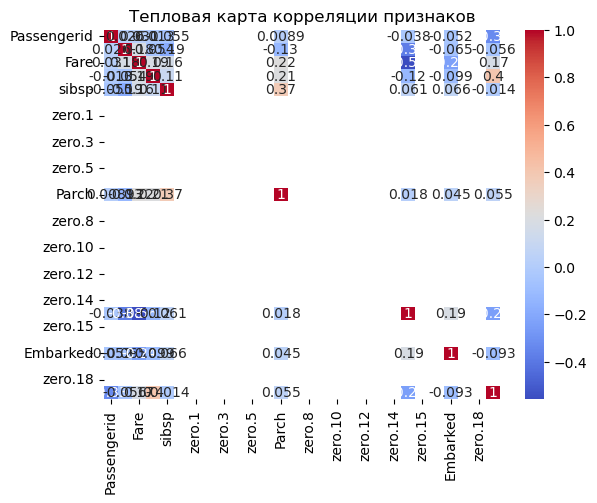

Наибольшая корреляция: 1.0, между признаками: ('Passengerid', 'Passengerid')

Наиболее взаимосвязанные признаки:


In [159]:
# Вычисление матрицы корреляции
correlation_matrix = df.corr()

# Создание тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Тепловая карта корреляции признаков')
plt.show()

# Нахождение наибольшей корреляции
max_correlation = correlation_matrix.max().max()
max_correlation_pair = correlation_matrix.unstack().sort_values(ascending=False).index[0]
print(f"Наибольшая корреляция: {max_correlation}, между признаками: {max_correlation_pair}")

# Вывод по наибольшей корреляции
print("\nНаиболее взаимосвязанные признаки:")
for pair, corr in correlation_matrix.unstack().sort_values(ascending=False).head(5).items():
  if pair[0] != pair[1] and abs(corr) > 0.5: # Отсеиваем корреляцию признака с самим собой и слабые корреляции
    print(f"- {pair[0]} и {pair[1]}: {corr:.2f}") 

- Найти наименьшую корреляцию между признаками и сделать вывод по этому

In [161]:
# Нахождение наименьшей корреляции
min_correlation = correlation_matrix.min().min()
min_correlation_pair = correlation_matrix.unstack().sort_values().index[0]
print(f"Наименьшая корреляция: {min_correlation}, между признаками: {min_correlation_pair}") 

# Вывод по наименьшей корреляции
print("\nНаименее взаимосвязанные признаки:")
for pair, corr in correlation_matrix.unstack().sort_values().head(5).items():
  if pair[0] != pair[1] and abs(corr) < 0.2: # Отсеиваем корреляцию признака с самим собой и слабые корреляции
    print(f"- {pair[0]} и {pair[1]}: {corr:.2f}")

Наименьшая корреляция: -0.5586833572857136, между признаками: ('Fare', 'Pclass')

Наименее взаимосвязанные признаки:


- Описать холодные цвета или отрицательные значения

In [163]:
print("Холодные цвета (синий) на тепловой карте указывают на отрицательную корреляцию.")

Холодные цвета (синий) на тепловой карте указывают на отрицательную корреляцию.


## Показать соотношение между атрибутами (piarplot или pairgrid);

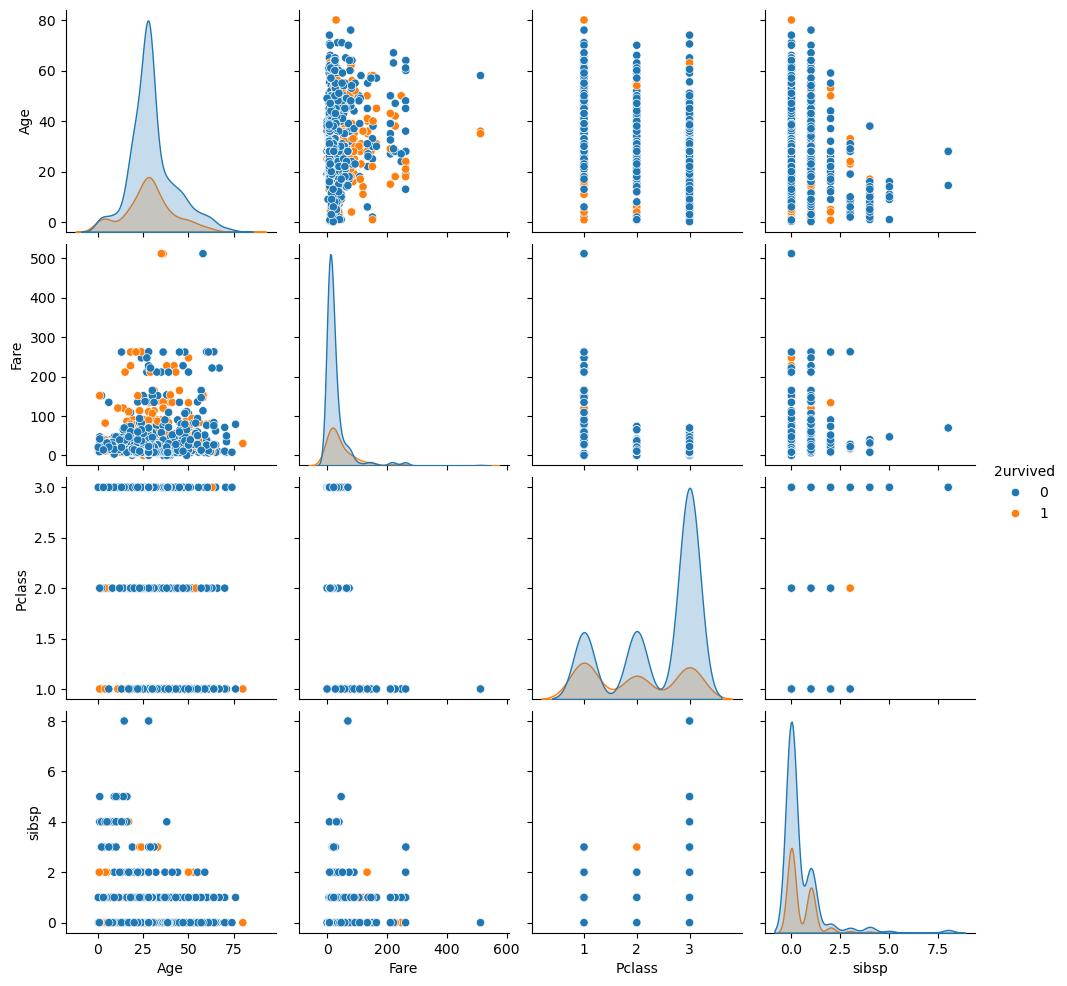

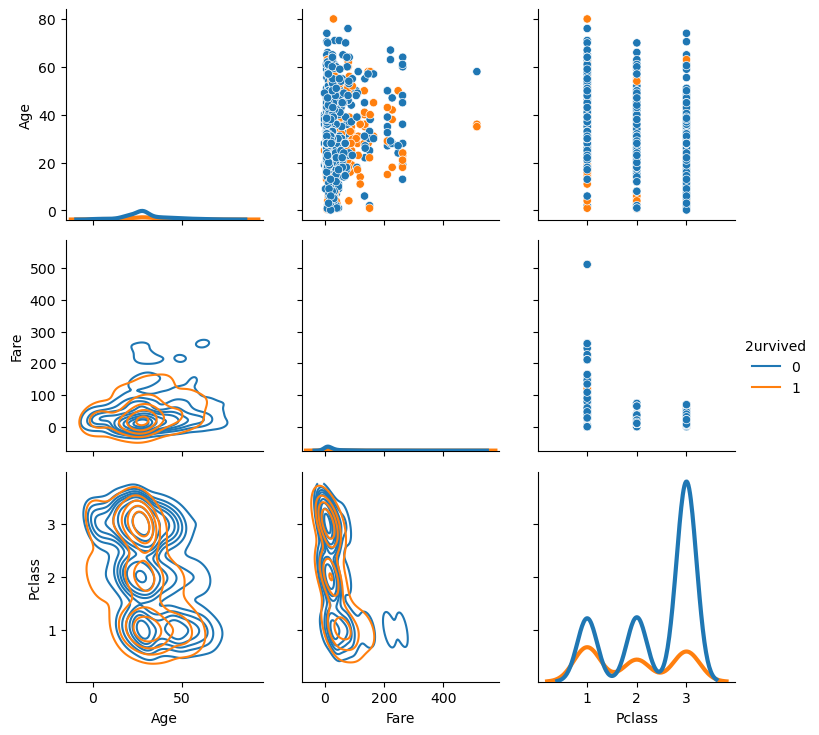

In [125]:
# Pairplot для выбранных атрибутов
sns.pairplot(df, vars=['Age', 'Fare', 'Pclass', 'sibsp'], hue='2urvived', diag_kind='kde') 
plt.show()

# Pairgrid для выбранных атрибутов
g = sns.PairGrid(df, vars=['Age', 'Fare', 'Pclass'], hue='2urvived')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3)
g.add_legend()
plt.show()

***Вывод:*** В процессе выполнения работы были успешно продемонстрированы навыки разведочного анализа данных, включающие загрузку датасета, просмотр и исследование его структуры, обработку: удаление признаков, замену и удаление значений, сортировку по столбцу, удаление дубликатов.